In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.metrics import classification_report,confusion_matrix
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows',None)

In [2]:
df=pd.read_csv('emp_promotion.csv')

In [3]:
df.shape

(54808, 14)

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


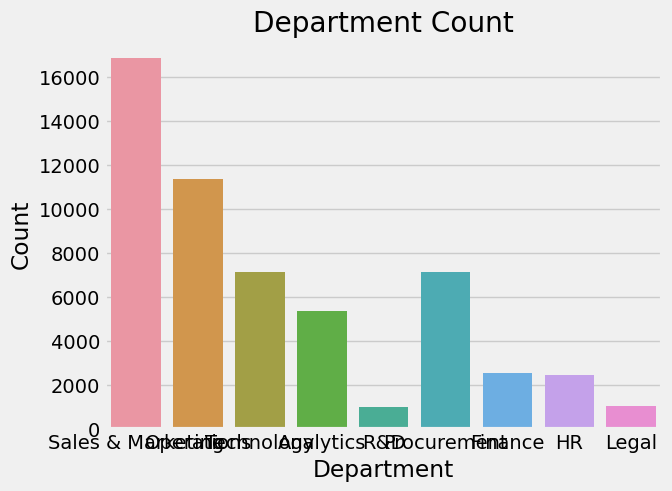

In [5]:
sns.countplot(x='department', data=df)
plt.title('Department Count')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

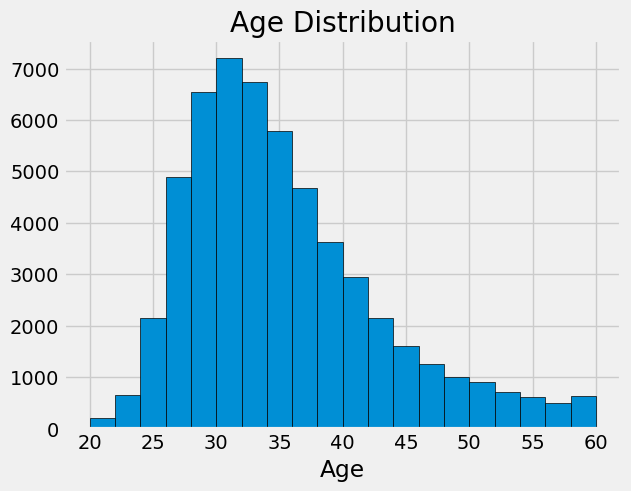

In [6]:
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

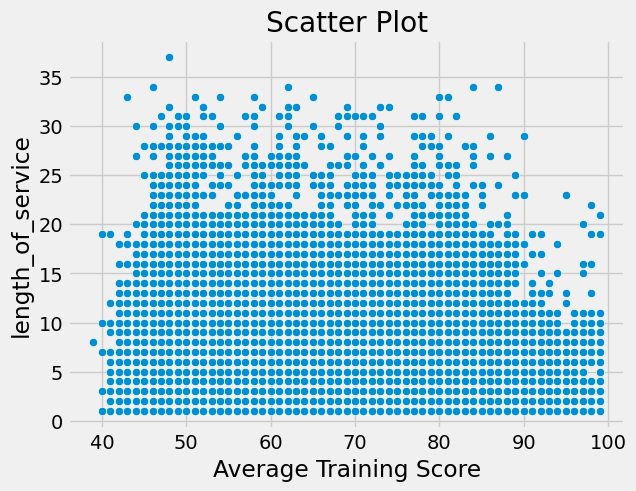

In [7]:
sns.scatterplot(x='avg_training_score', y='length_of_service', data=df)
plt.xlabel('Average Training Score')
plt.ylabel('length_of_service')
plt.title('Scatter Plot')
plt.show()

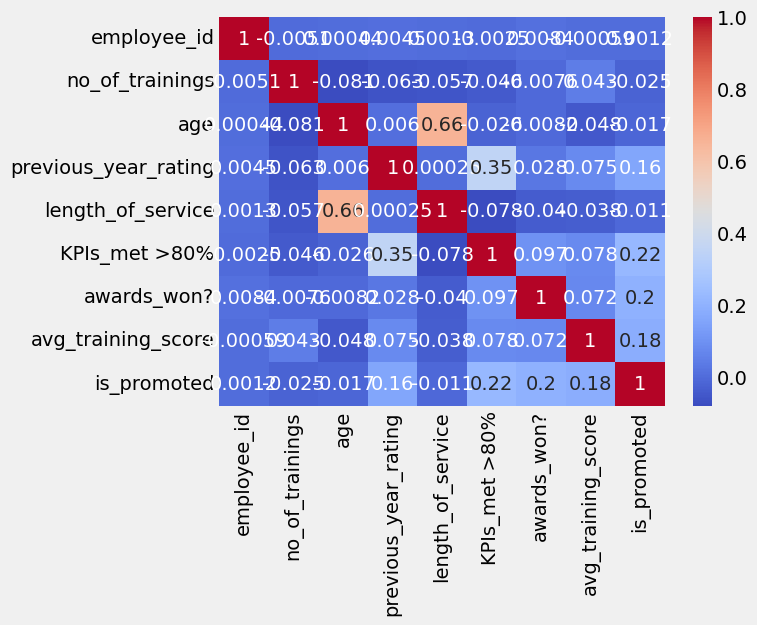

In [8]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [9]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [11]:
# Drop unwanted features
df = df.drop(['employee_id', 'region', 'gender', 'recruitment_channel'], axis=1)
df.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,1,45,3.0,2,0,0,73,0


In [12]:
print(df.isnull().sum())

department                 0
education               2409
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


In [13]:
print(df['education'].value_counts())
df['education'] = df['education'].fillna(df['education'].mode()[0])

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


In [14]:
print(df['previous_year_rating'].value_counts())
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


In [15]:
print(df.isnull().sum())

department              0
education               0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


In [16]:
negative=df[(df['KPIs_met >80%']==0)&(df['awards_won?']==0)&(df['previous_year_rating']==1.0)&(df['is_promoted']==1)&(df['avg_training_score']<60)]
negative

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31860,Sales & Marketing,Bachelor's,1,27,1.0,2,0,0,58,1
51374,Sales & Marketing,Bachelor's,1,31,1.0,5,0,0,58,1


In [17]:
df.drop(index=[31860,51374],inplace=True)

In [18]:
df.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,1,45,3.0,2,0,0,73,0


In [19]:
df.shape

(54806, 10)

<Axes: >

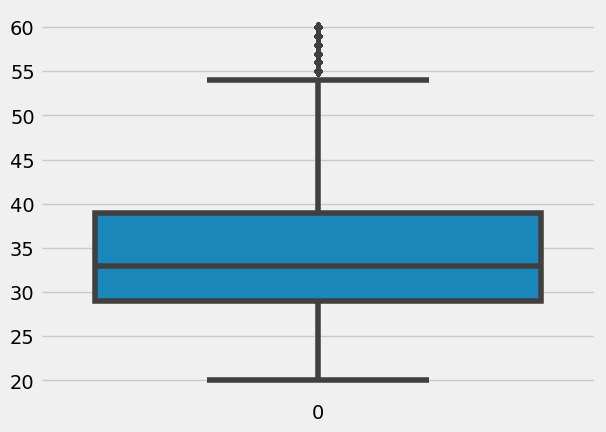

In [20]:
sns.boxplot(df['age'])

<Axes: >

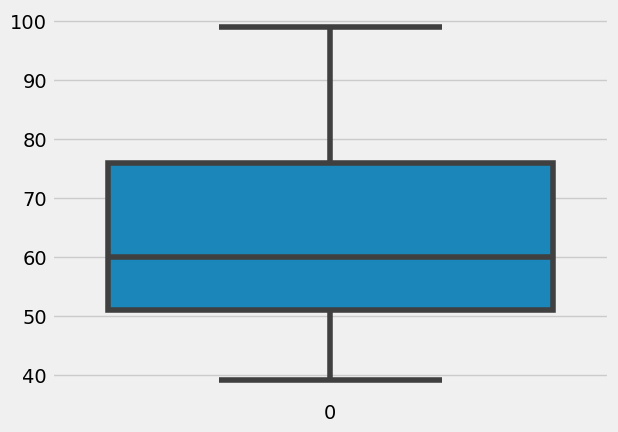

In [21]:
sns.boxplot(df['avg_training_score'])

<Axes: >

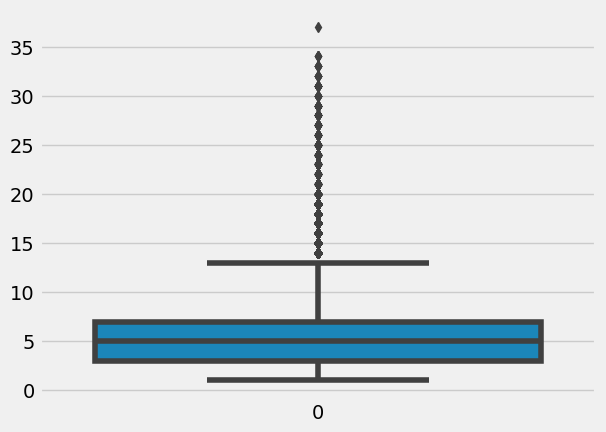

In [22]:
sns.boxplot(df['length_of_service'])

In [23]:
# Handle outliers with capping
numerical_cols = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [24]:
q1=np.quantile(df['length_of_service'],0.25)
q3=np.quantile(df['length_of_service'],0.75)
IQR= q3-q1
upper_bound=(1.5*IQR)+q3
lower_bound=(1.5*IQR)-q1
print("Skewed data:",len(df[df['length_of_service']>upper_bound]))

Skewed data: 0


In [25]:
pd.crosstab([df['length_of_service']>upper_bound],df['is_promoted'])

is_promoted,0,1
length_of_service,,
False,50140,4666


In [26]:
df['length_of_service']=[upper_bound if x>upper_bound else x for x in df['length_of_service']]

In [27]:
pd.crosstab([df['length_of_service']<lower_bound],df['is_promoted'])

is_promoted,0,1
length_of_service,,
False,39881,3695
True,10259,971


In [28]:
df['length_of_service']=[upper_bound if x<lower_bound else x for x in df['length_of_service']]

<Axes: >

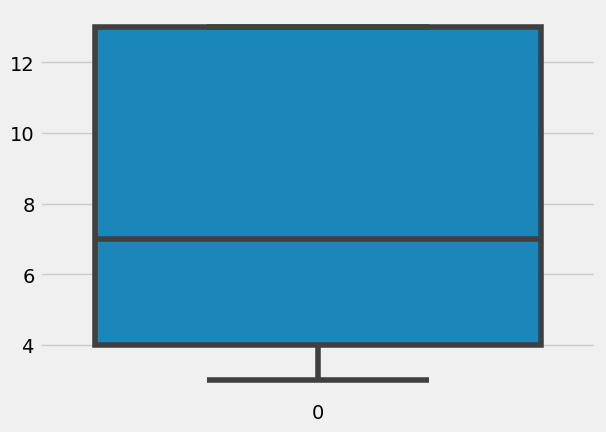

In [29]:
sns.boxplot(df['length_of_service'])

In [30]:
le = LabelEncoder()
df['department'] = le.fit_transform(df['department'])
df['education'] = le.fit_transform(df['education'])
df.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,2,1.0,35.0,5.0,8.0,1,0,49.0,0
1,4,0,1.0,30.0,5.0,4.0,0,0,60.0,0
2,7,0,1.0,34.0,3.0,7.0,0,0,50.0,0
3,7,0,1.0,39.0,1.5,10.0,0,0,50.0,0
4,8,0,1.0,45.0,3.0,13.0,0,0,73.0,0


In [31]:
X=df.drop('is_promoted',axis=1)
y=df['is_promoted']
print(X.shape)
print(y.shape)

(54806, 9)
(54806,)


In [32]:
count_0 = np.count_nonzero(y == 0)
count_1 = np.count_nonzero(y== 1)

print(f"Number of 0s before sampling: {count_0}")
print(f"Number of 1s before sampling: {count_1}")

Number of 0s before sampling: 50140
Number of 1s before sampling: 4666


In [33]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_new,y_new=sm.fit_resample(X,y)

In [34]:
count_0 = np.count_nonzero(y_new == 0)
count_1 = np.count_nonzero(y_new== 1)

print(f"Number of 0s after sampling: {count_0}")
print(f"Number of 1s after sampling: {count_1}")

Number of 0s after sampling: 50140
Number of 1s after sampling: 50140


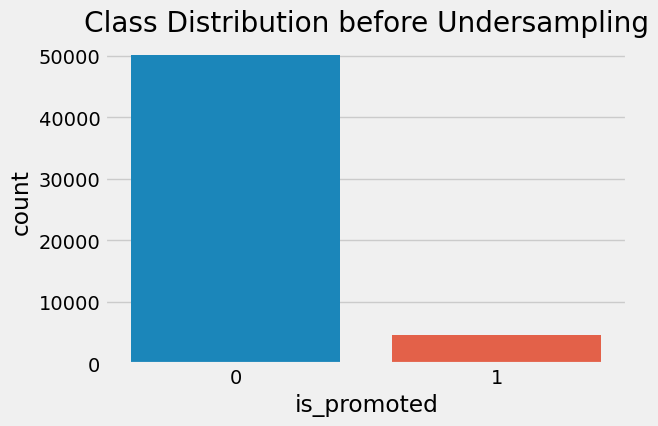

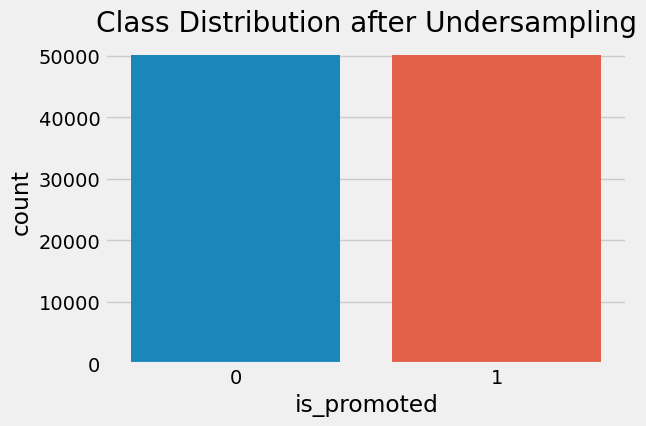

In [35]:
# visualize the class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Class Distribution before Undersampling')
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(x=y_new)
plt.title('Class Distribution after Undersampling')
plt.show()

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

In [37]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (70196, 9)
X_test shape: (30084, 9)
y_train shape: (70196,)
y_test shape: (30084,)


In [38]:
#Importing the models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
xgb_model = XGBClassifier(random_state=42)


In [39]:
# Train the models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate each model
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'KNN': knn_model,
    'XGBoost': xgb_model
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Evaluation for {model_name}:\n")
    print(confusion_matrix(y_test, y_pred))
    print("\n")
    print(classification_report(y_test, y_pred))
    print("="*80)


Evaluation for Decision Tree:

[[14202   978]
 [ 1014 13890]]


              precision    recall  f1-score   support

           0       0.93      0.94      0.93     15180
           1       0.93      0.93      0.93     14904

    accuracy                           0.93     30084
   macro avg       0.93      0.93      0.93     30084
weighted avg       0.93      0.93      0.93     30084

Evaluation for Random Forest:

[[14545   635]
 [  878 14026]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     15180
           1       0.96      0.94      0.95     14904

    accuracy                           0.95     30084
   macro avg       0.95      0.95      0.95     30084
weighted avg       0.95      0.95      0.95     30084

Evaluation for KNN:

[[12411  2769]
 [  441 14463]]


              precision    recall  f1-score   support

           0       0.97      0.82      0.89     15180
           1       0.84      0.97      0.90     14904



In [42]:
# Define a function to compare models
def compareModel(models, X, y):
    results = {}
    for model_name, model in models.items():
        scores = cross_val_score(model, X, y, cv=5)
        results[model_name] = scores.mean()
    return results

# Comparing models
model_scores = compareModel(models, X_train, y_train)
print("Model Comparison:")
for model_name, score in model_scores.items():
    print(f"{model_name}: Mean Cross-Validation Accuracy = {score}")


Model Comparison:
Decision Tree: Mean Cross-Validation Accuracy = 0.9292552675300734
Random Forest: Mean Cross-Validation Accuracy = 0.946948592940829
KNN: Mean Cross-Validation Accuracy = 0.8828423567315227
XGBoost: Mean Cross-Validation Accuracy = 0.9426605656322874


In [43]:
from sklearn.model_selection import RandomizedSearchCV
import time

# Decision Tree reduced parameter grid
dt_params = {
    'criterion': ['gini', 'entropy'],  # Criterion options
    'max_depth': [None, 10, 20, 30],  # Depth options
    'min_samples_split': [2, 5, 10],  # Min samples to split options
    'min_samples_leaf': [1, 2, 4]  # Min samples per leaf options
}


In [44]:
rf_params = {
    'n_estimators': [100, 200],  # Reduced options
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}


In [45]:
knn_params = {
    'n_neighbors': [3, 5, 7],  # Reduced range
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [46]:
# XGBoost reduced parameter grid
xgb_params = {
    'n_estimators': [100, 200],  # Reduced options
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'min_child_weight': [1, 3]
}

In [47]:
# Perform Randomized Search for each model
start_time = time.time()

# Decision Tree
dt_grid = RandomizedSearchCV(dt_model, dt_params, cv=3, scoring='accuracy', n_iter=20, n_jobs=-1, random_state=42)
dt_grid.fit(X_train, y_train)
dt_best_model = dt_grid.best_estimator_

# Random Forest
rf_grid = RandomizedSearchCV(rf_model, rf_params, cv=3, scoring='accuracy', n_iter=20, n_jobs=-1, random_state=42)
rf_grid.fit(X_train, y_train)
rf_best_model = rf_grid.best_estimator_

# KNN
knn_grid = RandomizedSearchCV(knn_model, knn_params, cv=3, scoring='accuracy', n_iter=20, n_jobs=-1, random_state=42)
knn_grid.fit(X_train, y_train)
knn_best_model = knn_grid.best_estimator_

# XGBoost
xgb_grid = RandomizedSearchCV(xgb_model, xgb_params, cv=3, scoring='accuracy', n_iter=20, n_jobs=-1, random_state=42)
xgb_grid.fit(X_train, y_train)
xgb_best_model = xgb_grid.best_estimator_

end_time = time.time()
print(f"Total tuning time: {(end_time - start_time)/60:.2f} minutes")

Total tuning time: 1.60 minutes


In [48]:
# Evaluate each tuned model
tuned_models = {
    'Decision Tree': dt_best_model,
    'Random Forest': rf_best_model,
    'KNN': knn_best_model,
    'XGBoost': xgb_best_model
}

for model_name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    print(f"Evaluation for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("="*80)

Evaluation for Decision Tree:
[[14202   978]
 [ 1014 13890]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     15180
           1       0.93      0.93      0.93     14904

    accuracy                           0.93     30084
   macro avg       0.93      0.93      0.93     30084
weighted avg       0.93      0.93      0.93     30084

Evaluation for Random Forest:
[[14203   977]
 [  789 14115]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     15180
           1       0.94      0.95      0.94     14904

    accuracy                           0.94     30084
   macro avg       0.94      0.94      0.94     30084
weighted avg       0.94      0.94      0.94     30084

Evaluation for KNN:
[[13720  1460]
 [  727 14177]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     15180
           1       0.91      0.95      0.93     14904

    accur

In [49]:
# Compare models
def compareModel(models, X, y):
    results = {}
    for model_name, model in models.items():
        scores = cross_val_score(model, X, y, cv=5)
        results[model_name] = scores.mean()
    return results

# Comparing tuned models
model_scores = compareModel(tuned_models, X_train, y_train)
print("Model Comparison:")
for model_name, score in model_scores.items():
    print(f"{model_name}: Mean Cross-Validation Accuracy = {score:.4f}")

Model Comparison:
Decision Tree: Mean Cross-Validation Accuracy = 0.9293
Random Forest: Mean Cross-Validation Accuracy = 0.9382
KNN: Mean Cross-Validation Accuracy = 0.9205
XGBoost: Mean Cross-Validation Accuracy = 0.9316


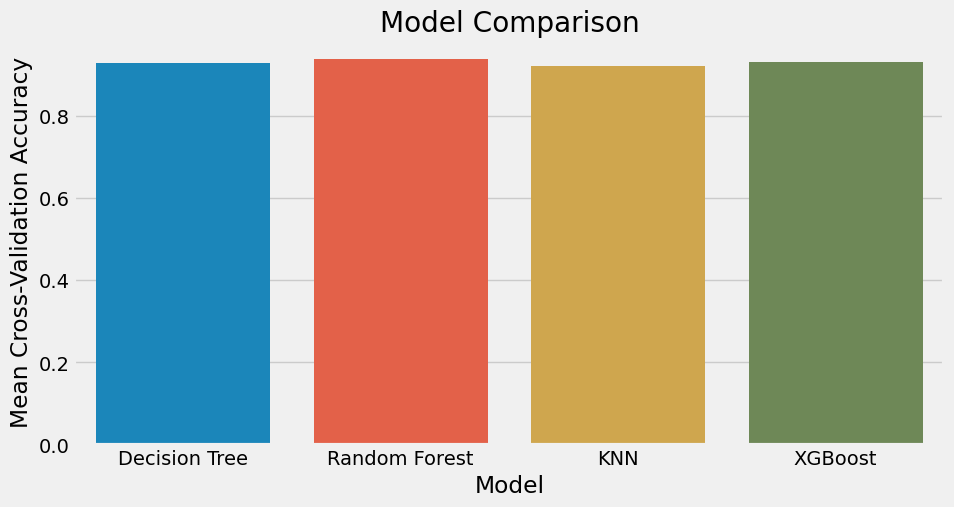

In [50]:
model_names = list(model_scores.keys())
performance_scores = list(model_scores.values())

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=performance_scores)
plt.xlabel('Model')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Model Comparison')
plt.show()

In [54]:
print(f"The best model is {best_model_name} with a mean cross-validation accuracy of {model_scores[best_model_name]:.4f}")


The best model is Random Forest with a mean cross-validation accuracy of 0.9382


In [61]:
df.head(1)


,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,2,1.0,35.0,5.0,8.0,1,0,49.0,0


In [66]:
best_model_name = max(model_scores, key=model_scores.get)
best_model = tuned_models[best_model_name]
with open('hr.pkl','wb') as f:
    pickle.dump(best_model,f)

In [68]:
best_model=pickle.load(open('hr.pkl','rb'))
best_model.predict([[7,2,1.0,35.0,5.0,8.0,1,0,49.0]])[0]

0